In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
reg = pd.read_csv('./Regular_Season_Batter.csv')

In [3]:
reg.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [8]:
reg.info()
# float과 int와 object로 구성된 데이터 프레임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

In [43]:
reg_float = reg[["avg", 'SLG', 'OBP', 'OPS']]

In [44]:
reg_float

,avg,SLG,OBP,OPS
0,0.339,0.519,0.383,0.902
1,0.000,0.000,0.000,0.000
2,0.221,0.349,0.337,0.686
3,0.257,0.325,0.348,0.673
4,0.158,0.257,0.232,0.489
...,...,...,...,...
2449,0.000,0.000,0.000,0.000
2450,0.000,0.000,0.000,0.000
2451,0.000,0.000,0.000,0.000
2452,0.291,0.402,0.359,0.761


In [58]:
reg_float.describe()

,avg,SLG,OBP,OPS
count,2428.000000,2428.000000,2430.000000,2428.000000
mean,0.237559,0.343826,0.306684,0.649939
std,0.098440,0.163335,0.111778,0.261634
min,0.000000,0.000000,0.000000,0.000000
25%,0.203000,0.267454,0.272727,0.546000
50%,0.255000,0.360124,0.328592,0.688637
75%,0.291000,0.436000,0.367000,0.797234
max,1.000000,3.000000,1.000000,4.000000


In [59]:
reg_float.corr()

,avg,SLG,OBP,OPS
avg,1.000000,0.868183,0.898050,0.919696
SLG,0.868183,1.000000,0.825292,0.971387
OBP,0.898050,0.825292,1.000000,0.935797
OPS,0.919696,0.971387,0.935797,1.000000


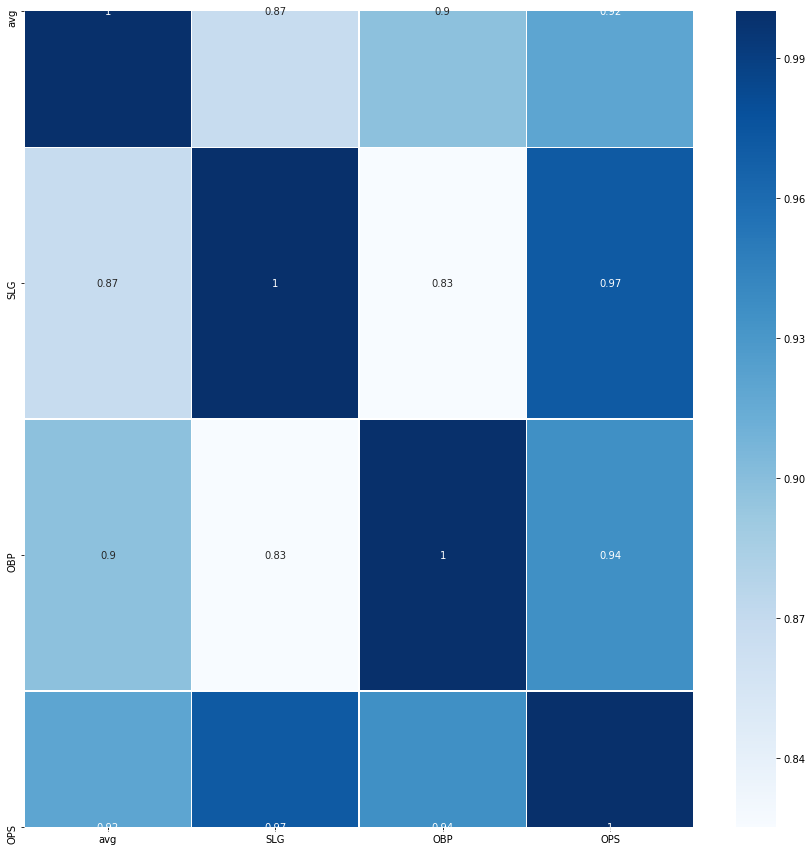

In [61]:
plt.figure(figsize = (15,15))
sns.heatmap(data = reg_float.corr(), annot=True, linewidths=.5, cmap="Blues")
#annot : 숫자표시를 할껀지 말껀지 

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm

In [69]:
result = sm.ols(formula = 'avg ~ SLG + OBP + OPS', data = reg_float).fit()


In [70]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    avg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:12:18   Log-Likelihood:                 4546.1
No. Observations:                2428   AIC:                            -9086.
Df Residuals:                    2425   BIC:                            -9069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009      0.002     -0.395      0.693      -0.005       0.004
SLG           -0.0097      0.009     -1.067      0.286      -0.028       0.008
OBP            0.2595      0.010     24.773      0.000       0.239       0.280
OPS            0.2498      0.002    105.388      0.000       0.245       0.254
==============================================================================
Omnibus:                      823.866   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48937.183
Skew:                           0.774   Prob(JB):                         0.00
Kurtosis:                      24.939   Cond. No.                     1.34e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
result = sm.ols(formula = 'avg ~  OBP + OPS', data = reg_float).fit()



In [72]:
result.summary()
#독립변수가 두개뿐인데 다중공선성 없을거같다 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    avg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:13:38   Log-Likelihood:                 4546.1
No. Observations:                2428   AIC:                            -9086.
Df Residuals:                    2425   BIC:                            -9069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009      0.002     -0.395      0.693      -0.005       0.004
OBP            0.2692      0.019     13.820      0.000       0.231       0.307
OPS            0.2401      0.008     29.303      0.000       0.224       0.256
==============================================================================
Omnibus:                      823.866   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48937.183
Skew:                           0.774   Prob(JB):                         0.00
Kurtosis:                      24.939   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [79]:
resid = result.resid

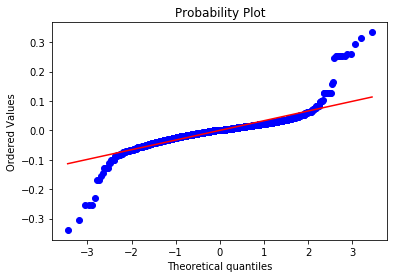

In [81]:
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()
#잔차의 정규성 검정 
#이상값도 존재하고 정규성을 충족한다기에는 애매하다 

In [49]:
reg_int = reg[['G', 'AB', 'R', 'H',"HR", 'TB','RBI', 'SB', 'CS','BB','HBP','SO',
'GDP','E']]

In [50]:
reg_int

,G,AB,R,H,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,E
0,50,183,27,62,8,95,34,5,0,9,8,25,3,9
1,2,1,0,0,0,0,0,0,0,0,0,1,0,1
2,41,86,11,19,1,30,7,0,0,13,2,28,1,6
3,120,311,50,80,2,101,27,4,3,40,5,58,3,15
4,46,101,16,16,1,26,7,0,0,8,2,30,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,5,5,0,0,0,0,0,0,0,0,0,1,0,0
2450,2,2,0,0,0,0,0,0,0,0,0,0,0,0
2451,11,10,2,0,0,0,0,0,1,0,0,5,0,0
2452,60,117,18,34,1,47,16,4,0,10,3,38,2,4


In [51]:
reg_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 14 columns):
G      2454 non-null int64
AB     2454 non-null int64
R      2454 non-null int64
H      2454 non-null int64
HR     2454 non-null int64
TB     2454 non-null int64
RBI    2454 non-null int64
SB     2454 non-null int64
CS     2454 non-null int64
BB     2454 non-null int64
HBP    2454 non-null int64
SO     2454 non-null int64
GDP    2454 non-null int64
E      2454 non-null int64
dtypes: int64(14)
memory usage: 268.5 KB


In [83]:
reg_int.isnull().sum()
#결측값이 없는 완벽한 모델 

G      0
AB     0
R      0
H      0
HR     0
TB     0
RBI    0
SB     0
CS     0
BB     0
HBP    0
SO     0
GDP    0
E      0
dtype: int64

In [102]:
reg_int[""]

0       183
1         1
2        86
3       311
4       101
       ... 
2449      5
2450      2
2451     10
2452    117
2453     24
Name: AB, Length: 2454, dtype: int64

In [124]:
y=reg_int["R"].values
x=reg_int[["G", "AB", "H","HR", "TB","RBI", "SB", "CS","BB","HBP","SO",
"GDP","E"]].values
#x와 y를 구분 

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr = LinearRegression()

In [132]:
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

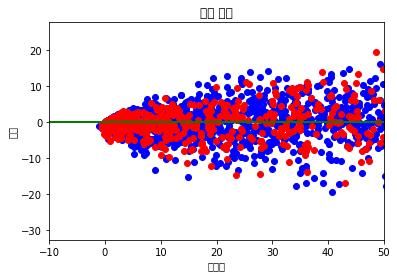

In [136]:
plt.scatter(y_train_pred , y_train_pred - y_train, c="Blue", label = "트레이닝 잔차")
plt.scatter(y_test_pred , y_test_pred - y_test, c="Red", label = "테스트 잔차")
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2,color = 'Green')
plt.xlim([-10,50])
plt.title('잔차 분석')
plt.show()

In [137]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [139]:
mse_train= mean_squared_error(y_train, y_train_pred)
mse_test= mean_squared_error(y_test, y_test_pred)
print(mse_train , mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(r2_train, r2_test)

31.275869710172138 42.23845950390842
0.9596331152654998 0.95531320718599


In [143]:
result1 = sm.ols(formula = 'R ~  G+ AB+ R+ H+ HR+ TB+ RBI+ SB+ CS+ BB+ HBP+ SO+GDP+ E', data = reg_int).fit()

In [144]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.112e+31
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:01:22   Log-Likelihood:                 71528.
No. Observations:                2454   AIC:                        -1.430e+05
Df Residuals:                    2439   BIC:                        -1.429e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.997e-15   2.24e-15     -1.785      0.074   -8.39e-15    3.95e-16
G           2.897e-16   7.43e-17      3.898      0.000    1.44e-16    4.35e-16
AB          3.678e-16   6.27e-17      5.868      0.000    2.45e-16    4.91e-16
R              1.0000   1.84e-16   5.44e+15      0.000       1.000       1.000
H          -8.049e-16   3.72e-16     -2.166      0.030   -1.53e-15   -7.62e-17
HR           1.11e-15    8.5e-16      1.306      0.192   -5.57e-16    2.78e-15
TB         -2.776e-17   2.82e-16     -0.098      0.922   -5.81e-16    5.25e-16
RBI         3.331e-16   1.83e-16      1.822      0.069   -2.55e-17    6.92e-16
SB         -5.135e-16   2.24e-16     -2.290      0.022   -9.53e-16   -7.38e-17
CS         -9.992e-16   6.16e-16     -1.621      0.105   -2.21e-15     2.1e-16
BB         -2.498e-16   1.28e-16     -1.954      0.051      -5e-16    8.69e-19
HBP                 0   3.67e-16          0      1.000    -7.2e-16     7.2e-16
SO          1.665e-16   9.27e-17      1.796      0.073   -1.53e-17    3.48e-16
GDP         2.776e-16   4.47e-16      0.621      0.534   -5.98e-16    1.15e-15
E           1.152e-15   2.98e-16      3.867      0.000    5.68e-16    1.74e-15
==============================================================================
Omnibus:                      219.424   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.568
Skew:                          -0.498   Prob(JB):                     1.22e-33
Kurtosis:                       2.299   Cond. No.                         665.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
reg_int.iloc[:,3:].values

array([[25,  3,  9],
       [ 1,  0,  1],
       [28,  1,  6],
       ...,
       [ 5,  0,  0],
       [38,  2,  4],
       [ 5,  0,  3]])

In [106]:
x

array([[3, 9],
       [0, 1],
       [1, 6],
       ...,
       [0, 0],
       [2, 4],
       [0, 3]])

In [10]:
from sklearn.model_selection import train_test_split
#학습데이터와 예측데이터로 분류 

In [16]:
x = reg[[ "AB", "R" , "H", "HR", "TB", "RBI", "SB", "CS", "BB","HBP", "SO","GDP"]]
y = reg["G"]
#x와 y선정

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
#train과 test셋을 나누기 train = 0.7 test = 0.3
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


1717
737
1717
737


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#랜덤포레스트 실행하는 패키지

In [19]:
#학습진행 
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(x_train,y_train)
#참고 : x,y에 결측값이 있으면 돌아가지않음 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))

print('정확도', metrics.accuracy_score(y_test, y_pred))
#예측결과 : 아주 좋지못한 결과를 보여준다


[108  12 100   7  54   8 114  99  38  26  52  81 129 100  45 126  16 103
 114 107   2  75  45 136  54   1 103  31 100  93  23 100   1 114 133  45
 106 125  64  37  56 114  54  22  26  46  88 103   6  43   4 122  52  83
 126 129  85  36  52  47   4 107  45  25 122 126 128 125  66  26  73 132
  35 144 113  26  97   7 138  76 116  19 133  42 104  80  47  48 116   9
  22  20 126 126  55  39  55  99 108  54 114 126 118 106 121 116  83  52
  70 129 121  51  25  11 133  28  38  10   1 111  27  15 114   1 125   3
  21 105 125 111   9  66 133   2  65  38 125  88 115  45   8  60 122  97
  22  15   9  52 103  26 126   9  35  47   7  99 133  28 104  78  37  15
 100  23 133  76   2  66  58  88 122 103 144  66  45  45 115  57  11  64
  55 134 100 101  61 144  63 110  24 144  81  54 133 105   2  57  17  39
  65  76  20  99   8  26   9 115   2 108  31  88 125  45   3  80 124   8
   1 132  77  25  95  77 108  88 142 144 103 128 109  93  37 113   3  99
  83  88  75 128  28 121   5 126  47 100  82 100 12

In [21]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn


/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
sns.pairplot(reg)

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Error in callback <function flush_figures at 0x1a2499db00> (for post_execute):


KeyboardInterrupt: 